In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [45]:
data = pd.read_csv('crime_data.csv')
data

,place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   place     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [47]:
#Clustering (Hierarchical Clustering )

In [48]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [50]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


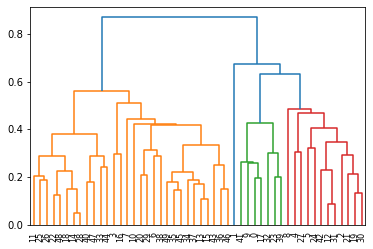

In [51]:
# create dendrogram
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [52]:
from scipy.cluster.hierarchy import linkage 


In [53]:
import scipy.cluster.hierarchy as sch

In [61]:
type(df_norm)

pandas.core.frame.DataFrame

In [62]:
z = linkage(df_norm, method="complete",metric="euclidean")

In [54]:
# create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

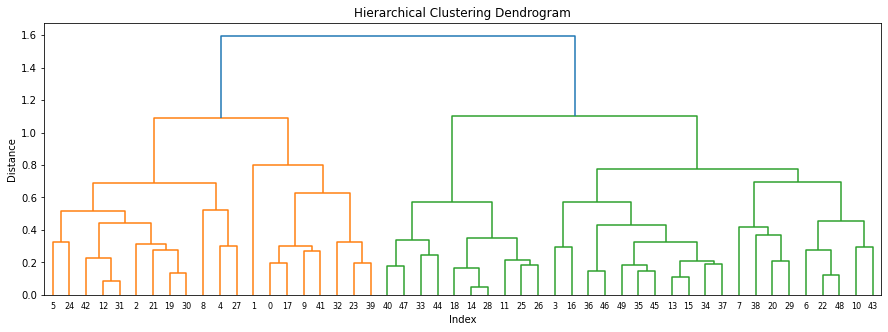

In [63]:
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [64]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [67]:
# Now applying AgglomerativeClustering choosing 3 as clusters from the dendrogram

In [69]:
from sklearn.cluster import AgglomerativeClustering

In [71]:
h_complete=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity = "euclidean").fit(df_norm) 
h_complete

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [82]:
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0     0
1     0
2     0
3     1
4     0
5     0
6     1
7     1
8     0
9     0
10    1
11    2
12    0
13    1
14    2
15    1
16    1
17    0
18    2
19    0
20    1
21    0
22    1
23    0
24    0
25    2
26    2
27    0
28    2
29    1
30    0
31    0
32    0
33    2
34    1
35    1
36    1
37    1
38    1
39    0
40    2
41    0
42    0
43    1
44    2
45    1
46    1
47    2
48    1
49    1
dtype: int64

In [76]:
data['clust']=cluster_labels
data['clust']

0     0
1     0
2     0
3     1
4     0
5     0
6     1
7     1
8     0
9     0
10    1
11    2
12    0
13    1
14    2
15    1
16    1
17    0
18    2
19    0
20    1
21    0
22    1
23    0
24    0
25    2
26    2
27    0
28    2
29    1
30    0
31    0
32    0
33    2
34    1
35    1
36    1
37    1
38    1
39    0
40    2
41    0
42    0
43    1
44    2
45    1
46    1
47    2
48    1
49    1
Name: clust, dtype: int64

In [81]:
data.head()

,place,Murder,Assault,UrbanPop,Rape,h_clusterid,clust
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,0,0
2,Arizona,8.1,294,80,31.0,0,0
3,Arkansas,8.8,190,50,19.5,1,1
4,California,9.0,276,91,40.6,0,0


In [83]:
# getting aggregate mean of each cluster
data.iloc[:,2:].groupby(data.clust).median()

,Assault,UrbanPop,Rape,h_clusterid,clust
clust,,,,,
0,254.5,70.0,27.35,0.0,0.0
1,132.5,70.0,18.40,1.0,1.0
2,82.0,52.0,11.25,2.0,2.0


In [55]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [56]:
data['h_clusterid']=hc.labels_
data 

,place,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [85]:
data.to_csv("data.csv",encoding="utf-8")
data

,place,Murder,Assault,UrbanPop,Rape,h_clusterid,clust
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,0,0
2,Arizona,8.1,294,80,31.0,0,0
3,Arkansas,8.8,190,50,19.5,1,1
4,California,9.0,276,91,40.6,0,0
5,Colorado,7.9,204,78,38.7,0,0
6,Connecticut,3.3,110,77,11.1,1,1
7,Delaware,5.9,238,72,15.8,1,1
8,Florida,15.4,335,80,31.9,0,0
9,Georgia,17.4,211,60,25.8,0,0


In [57]:
#K-Means

In [86]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np


In [59]:
data2 = pd.read_csv('crime_data.csv')
data2

,place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


<AxesSubplot:xlabel='X', ylabel='Y'>

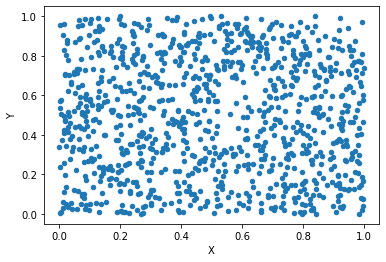

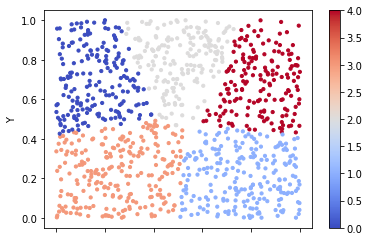

In [87]:
# Generating random uniform numbers 
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)
model1.labels_
model1.cluster_centers_
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


In [88]:
# Normalization function 
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)


In [91]:
df_norm = norm_func(data2.iloc[:,1:])

In [92]:
df_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [93]:
## screw plot or elbow curve ##

In [94]:
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x29c2ae4fe20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

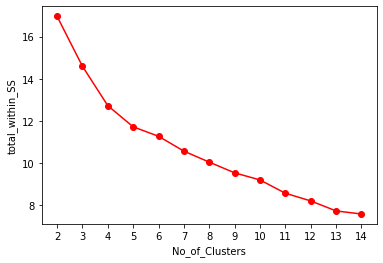

In [95]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [96]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)


KMeans(n_clusters=5)

In [98]:

model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
data2['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [102]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data2.iloc[:,1:])
scaled_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.63147111],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  0.16167732],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  0.16167732],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.57321958],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  0.16167732],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.16167732],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  0.89657421],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.57321958],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  0.16167732],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.63147111],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987,  0.89657421],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -1.30811648],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  0.16167732],
       [-0.13637203, -0.70012057, -0.0

In [103]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

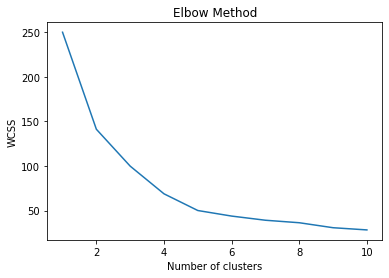

In [104]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [105]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [106]:
clusters_new.labels_

array([0, 3, 3, 1, 3, 3, 2, 2, 3, 0, 2, 1, 3, 2, 1, 2, 1, 0, 1, 3, 2, 3,
       1, 0, 3, 1, 1, 3, 1, 2, 3, 3, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 3, 2,
       1, 2, 2, 1, 1, 1])

In [107]:
#Assign clusters to the data set
data2['clusterid_new'] = clusters_new.labels_

In [108]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ,  1.63147111],
       [-0.84142469, -0.96113044, -0.91235073, -0.89931449, -1.1611371 ],
       [-0.51209088, -0.40436327,  0.64622905, -0.24143733,  0.3086567 ],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383,  0.10514679]])

In [109]:
data2.groupby('clusterid_new').agg(['mean'])


,Murder,Assault,UrbanPop,Rape,clust
,mean,mean,mean,mean,mean
clusterid_new,,,,,
0,14.671429,251.285714,54.285714,21.685714,4.000000
1,4.160000,91.466667,52.466667,12.893333,0.200000
2,5.580000,137.400000,74.800000,18.993333,2.200000
3,10.815385,257.384615,76.000000,33.192308,1.923077


In [111]:
#DBSCAN

In [112]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [113]:
data3=pd.read_csv('crime_data.csv')
data3

,place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [114]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   place     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [115]:
df=data3.iloc[:,1:]
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [122]:
array=df.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [121]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [118]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=2)

In [123]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [124]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [125]:
pd.concat([data3,cl],axis=1)

,place,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
